In [32]:
from differences import ATTgt
from matplotlib import pyplot as plt
plt.rcParams["figure.dpi"] = 300
plt.rcParams['savefig.dpi'] = 300
from panel_utilities import get_value_variable_names, convert_weekly_panel_to_biweekly_panel, prepare_df_for_DiD
from stats_utilities import select_controls, test_balance
from figure_utilities import aggregate_by_event_time_and_plot, aggregate_by_time_and_plot
import pandas as pd



# Store paths.
analysis='group_2_crimes_500m'
INPUT_DATA = "../../data/03_cleaned/crime_analysis_monthly.parquet"
OUTPUT_FIGURES = f"../../output/{analysis}/figures"
OUTPUT_TABLES = f"../../output/{analysis}/tables"


# Read restricted sample panel dataset into memory.
df = pd.read_parquet(INPUT_DATA)
df.columns.tolist()

['court_division',
 'court_person',
 'court_person_type',
 'disposition',
 'disposition_date',
 'disposition_found',
 'case_duration',
 'file_date',
 'hasAttyD',
 'hasAttyP',
 'iehap',
 'inhad',
 'initiating_action',
 'isEntityD',
 'isEntityP',
 'judgment',
 'judgment_for_pdu',
 'latest_docket_date',
 'property_address_full',
 'reason',
 'latitude',
 'longitude',
 'Latitude',
 'Longitude',
 'City',
 'County',
 'Full FIPS (block)',
 'tract_geoid',
 'Metro/Micro Statistical Area Name',
 'Combined Statistical Area Name',
 'file_month',
 'file_year',
 'latest_docket_month',
 'latest_docket_year',
 'Unnamed: 0',
 'med_hhinc2016',
 'popdensity2010',
 'share_white2010',
 'frac_coll_plus2010',
 'job_density_2013',
 'poor_share2010',
 'traveltime15_2010',
 'rent_twobed2015',
 'czname',
 '2012-12_zestimate',
 '2013-01_zestimate',
 '2013-02_zestimate',
 '2013-03_zestimate',
 '2013-04_zestimate',
 '2013-05_zestimate',
 '2013-06_zestimate',
 '2013-07_zestimate',
 '2013-08_zestimate',
 '2013-09_zest

In [ ]:
pre_pandemic_months = ['2019-04'
                       '2019-05'
                       '2019-06',
                       '2019-07',
                       '2019-08',
                       '2019-09',
                       '2019-10',
                       '2019-11',
                       '2019-12',
                       '2020-01',
                       '2020-02',
                       '2020-03']

df = df.loc[df['latest_docket_month'].isin(pre_pandemic_months), :]

In [22]:
# Convert weekly panel to biweekly panel.
treatment_date_variable = 'latest_docket_month'
df = df.dropna(subset=treatment_date_variable)
# df = convert_weekly_panel_to_biweekly_panel(df, treatment_date_variable, analysis)

# Generate value vars list and month to int dictionaries.
weekly_value_vars_crime, month_to_int_dictionary, int_to_month_dictionary = get_value_variable_names(df, analysis)

In [23]:
covariates_exploration_df = select_controls(df=df, analysis=analysis,
                                            treatment_date_variable=treatment_date_variable,
                                            output_directory=OUTPUT_TABLES)
covariates_exploration_df

Dependent Variable  \
                                                                                                                  
                                                 \emph{Independent Variable}                                      
Panel A: Pre-treatment Outcomes                  total_twenty_seventeen_group_2_crimes_500m        4.595408e-72   
                                                 pre_treatment_change_in_group_2_crimes_500m       2.776727e-04   
Panel B: Census Tract Characteristics            frac_coll_plus2010                                3.301602e-09   
                                                 job_density_2013                                  4.014577e-05   
                                                 med_hhinc2016                                     1.147880e-07   
                                                 poor_share2010                                    3.052110e-07   
                                                 popdensity2010                                    4.113742e-09   
Panel C: Case Initiation                         for_cause                                         6.664448e-01   
                                                 no_cause                                          8.854478e-01   
                                                 non_payment                                       6.050024e-01   
Panel D: Defendant and Plaintiff Characteristics hasAttyD                                          8.818935e-01   
                                                 hasAttyP                                          6.666626e-01   
                                                 isEntityD                                         3.620397e-01   
                                                 isEntityP                                         2.659473e-01   

                                                                                                        
                                                                                                        
                                                 \emph{Independent Variable}                            
Panel A: Pre-treatment Outcomes                  total_twenty_seventeen_group_2_crimes_500m   0.777653  
                                                 pre_treatment_change_in_group_2_crimes_500m  0.947118  
Panel B: Census Tract Characteristics            frac_coll_plus2010                           0.065969  
                                                 job_density_2013                             0.151709  
                                                 med_hhinc2016                                0.031014  
                                                 poor_share2010                               0.000039  
                                                 popdensity2010                               0.796100  
Panel C: Case Initiation                         for_cause                                    0.007188  
                                                 no_cause                                     0.588931  
                                                 non_payment                                  0.017316  
Panel D: Defendant and Plaintiff Characteristics hasAttyD                                     0.037884  
                                                 hasAttyP                                     0.194854  
                                                 isEntityD                                    0.067403  
                                                 isEntityP                                    0.025442

In [24]:
balance_table, pre_treatment_covariates = test_balance(df, analysis, covariates_exploration_df, OUTPUT_TABLES)
balance_table

\
                                              Cases Won by Plaintiff   
Panel A Total Group 2 Incidents, 2017                      15.856813   
        $\Delta$ Group 2 Incidents, 2017-2019              -3.725173   
Panel B Bachelor's degree, 2010                             0.329095   
        Job density, 2013                               18611.940391   
        Median household income, 2016                   47804.219400   
        Poverty rate, 2010                                  0.267113   
        Population density, 2010                        23288.997077   

                                              Difference in Cases Won by Defendant  \
                                                                        Unweighted   
Panel A Total Group 2 Incidents, 2017                                    -0.568793   
        $\Delta$ Group 2 Incidents, 2017-2019                            -0.040052   
Panel B Bachelor's degree, 2010                                           0.030449   
        Job density, 2013                                              4656.909815   
        Median household income, 2016                                  4012.049849   
        Poverty rate, 2010                                               -0.044690   
        Population density, 2010                                       -271.854486   

                                                                                
                                               \emph{p}     Weighted  \emph{p}  
Panel A Total Group 2 Incidents, 2017          0.777653    -0.783560  0.699152  
        $\Delta$ Group 2 Incidents, 2017-2019  0.947118     0.143943  0.811986  
Panel B Bachelor's degree, 2010                0.065969    -0.006498  0.567082  
        Job density, 2013                      0.151709   310.748207  0.915767  
        Median household income, 2016          0.031014 -1038.816392  0.220977  
        Poverty rate, 2010                     0.000039    -0.021313  0.005555  
        Population density, 2010               0.796100 -1020.591681  0.322085

In [25]:
# Generate indicators for missing data.

# missing_indicators = add_missing_indicators(df, ['rent_twobed2015'], pre_treatment_covariates)

# Prepare df for use with the differences package.
df = df.reset_index()
df = prepare_df_for_DiD(df=df,
                        analysis=analysis,
                        treatment_date_variable=treatment_date_variable,
                        pre_treatment_covariates=pre_treatment_covariates,
                        missing_indicators=[],
                        value_vars=weekly_value_vars_crime,
                        period_to_int_dictionary=month_to_int_dictionary)

In [26]:
# Run DiD without conditioning on covariates.
att_gt = ATTgt(data=df, cohort_name=treatment_date_variable, base_period='universal')
result = att_gt.fit(formula=analysis, control_group='not_yet_treated', n_jobs=-1)

Computing ATTgt [workers=10]  100%|████████████████████| 460/460 [00:06<00:00, 67.90it/s] 


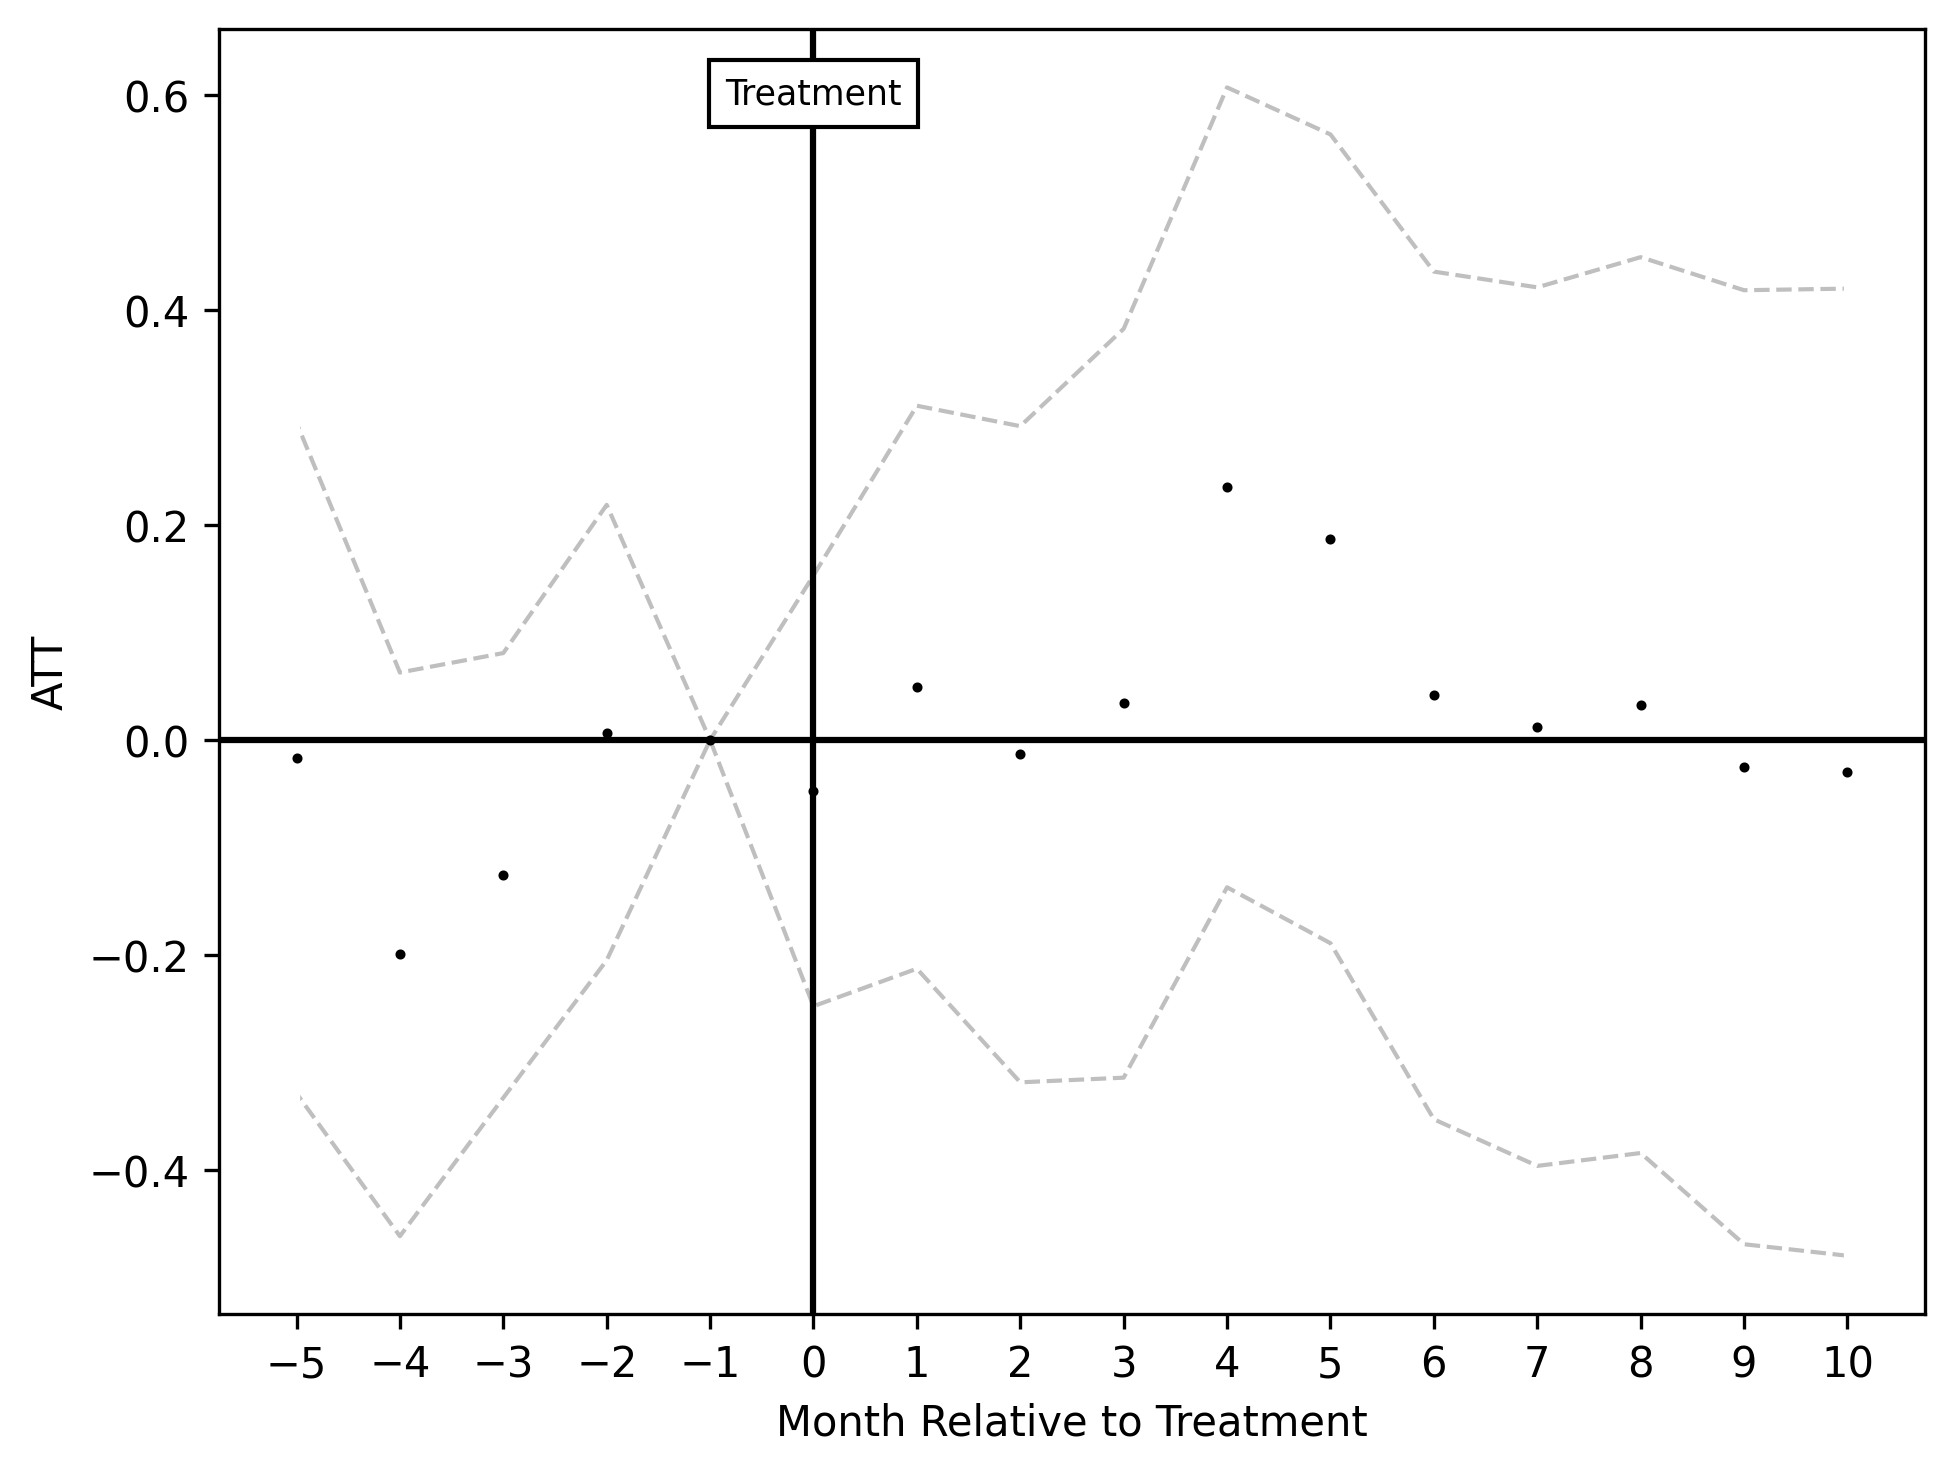

In [27]:
# Plot unconditional ATT(t-g)s on a long horizon.
aggregate_by_event_time_and_plot(att_gt, OUTPUT_FIGURES, "att_gt_unconditional_event_study_long_horizon.png",
                                 start_period=-5, end_period=10,
                                 title="",
                                 treatment_month_variable=treatment_date_variable, df=df)

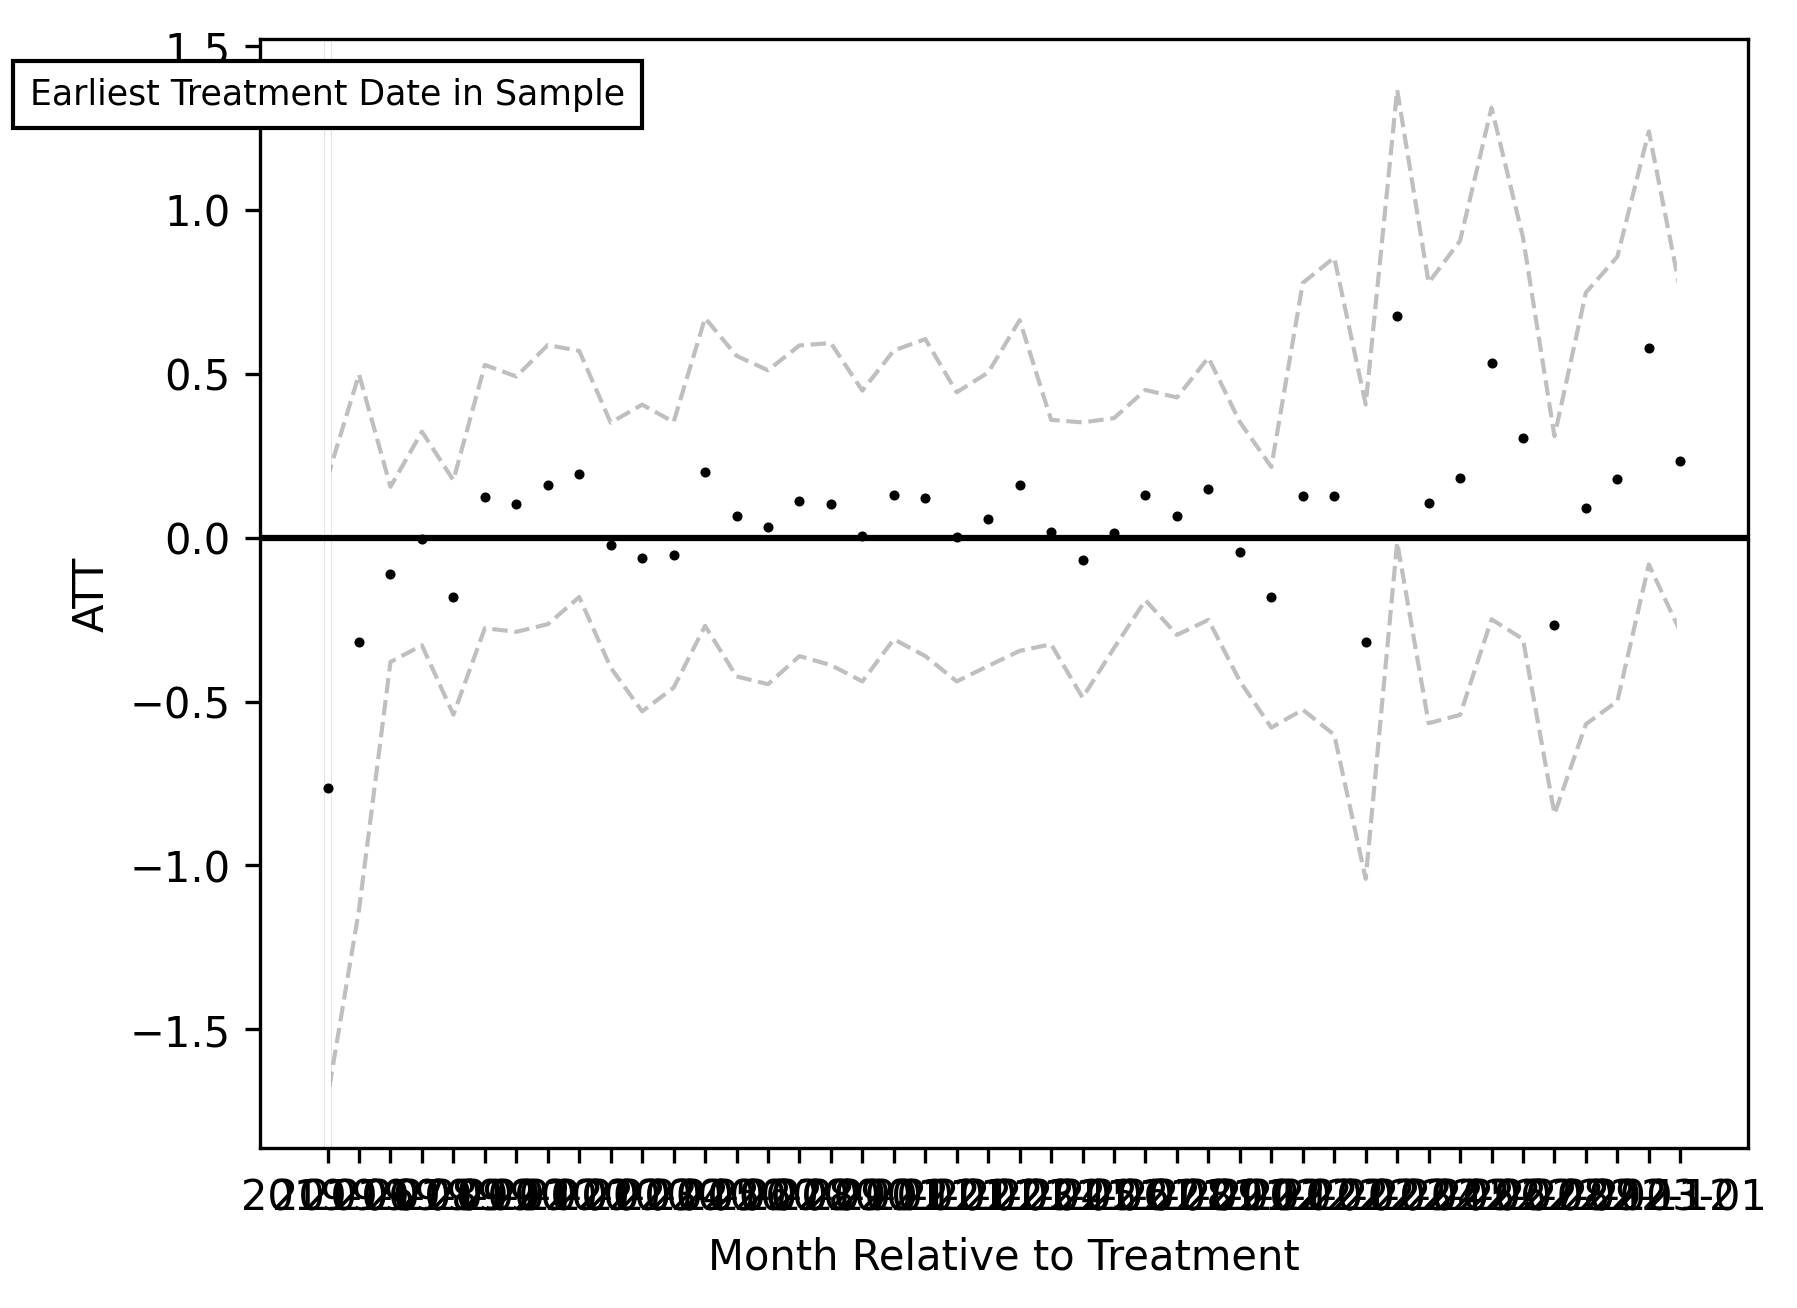

In [28]:
# Plot unconditional ATT(t)s.
aggregate_by_time_and_plot(att_gt, int_to_month_dictionary, OUTPUT_FIGURES, "att_gt_unconditional_time.png",
                           title="")

In [29]:
# Run DiD conditional on covariates.
att_gt = ATTgt(data=df, cohort_name=treatment_date_variable, freq='M', base_period='universal')
formula = f'{analysis} ~ ' + '+'.join(pre_treatment_covariates)
result = att_gt.fit(formula=formula, control_group='not_yet_treated', n_jobs=-1, progress_bar=True)

Computing ATTgt [workers=10]  100%|████████████████████| 460/460 [00:15<00:00, 29.61it/s]


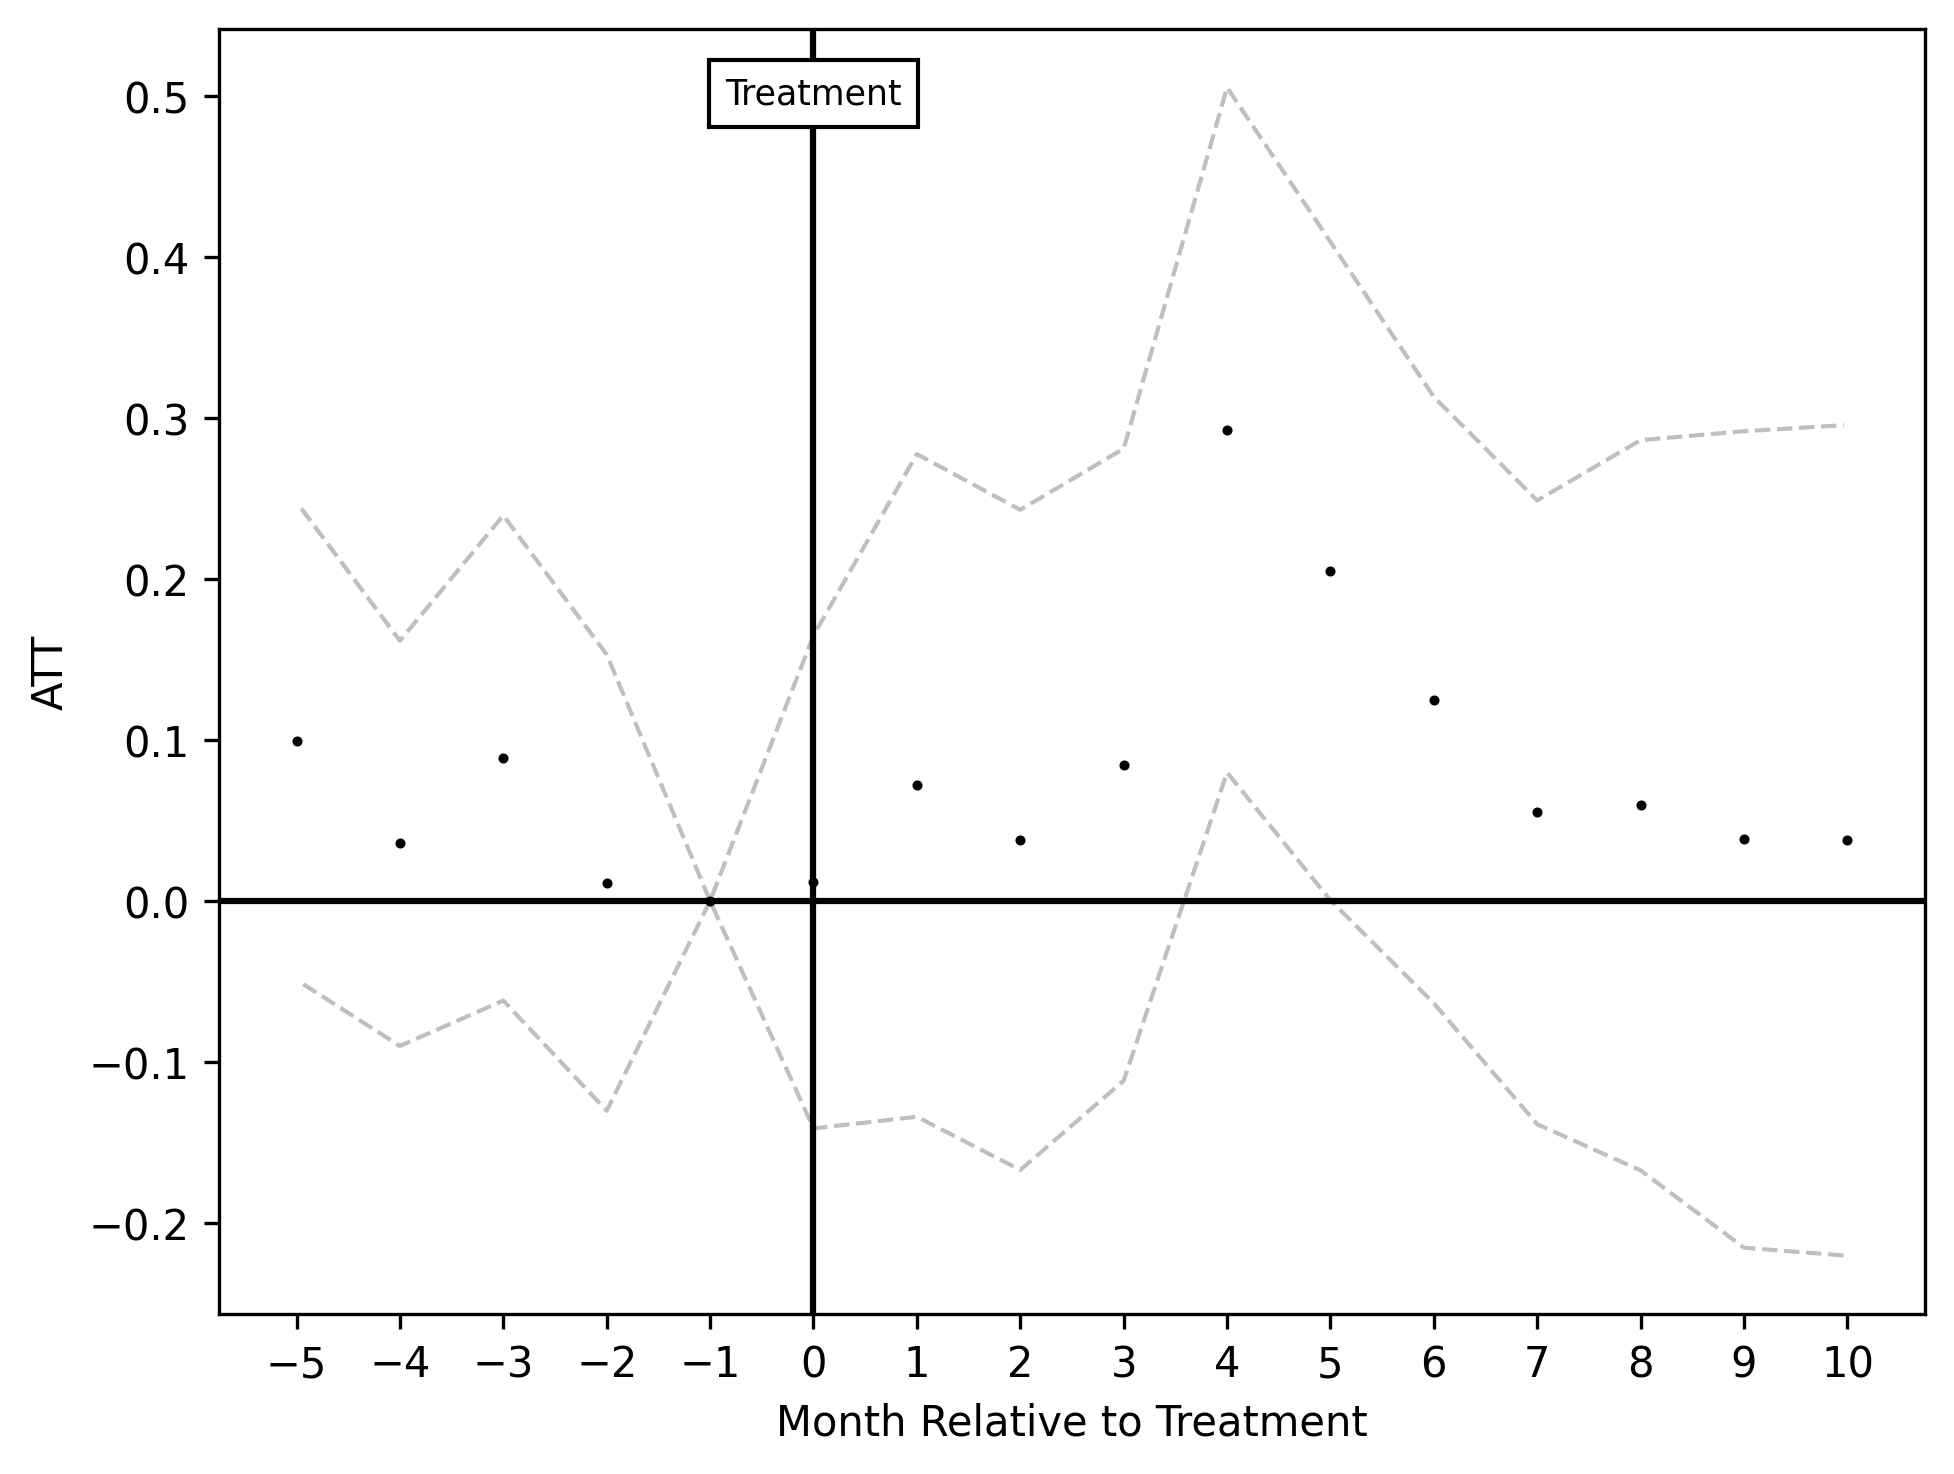

In [30]:
# Plot D.R. ATT(t-g)s on a long horizon.
aggregate_by_event_time_and_plot(att_gt, OUTPUT_FIGURES, "att_gt_dr_event_study_long_horizon.png", start_period=-5,
                                 end_period=10,
                                 title="",
                                 treatment_month_variable=treatment_date_variable, df=df)

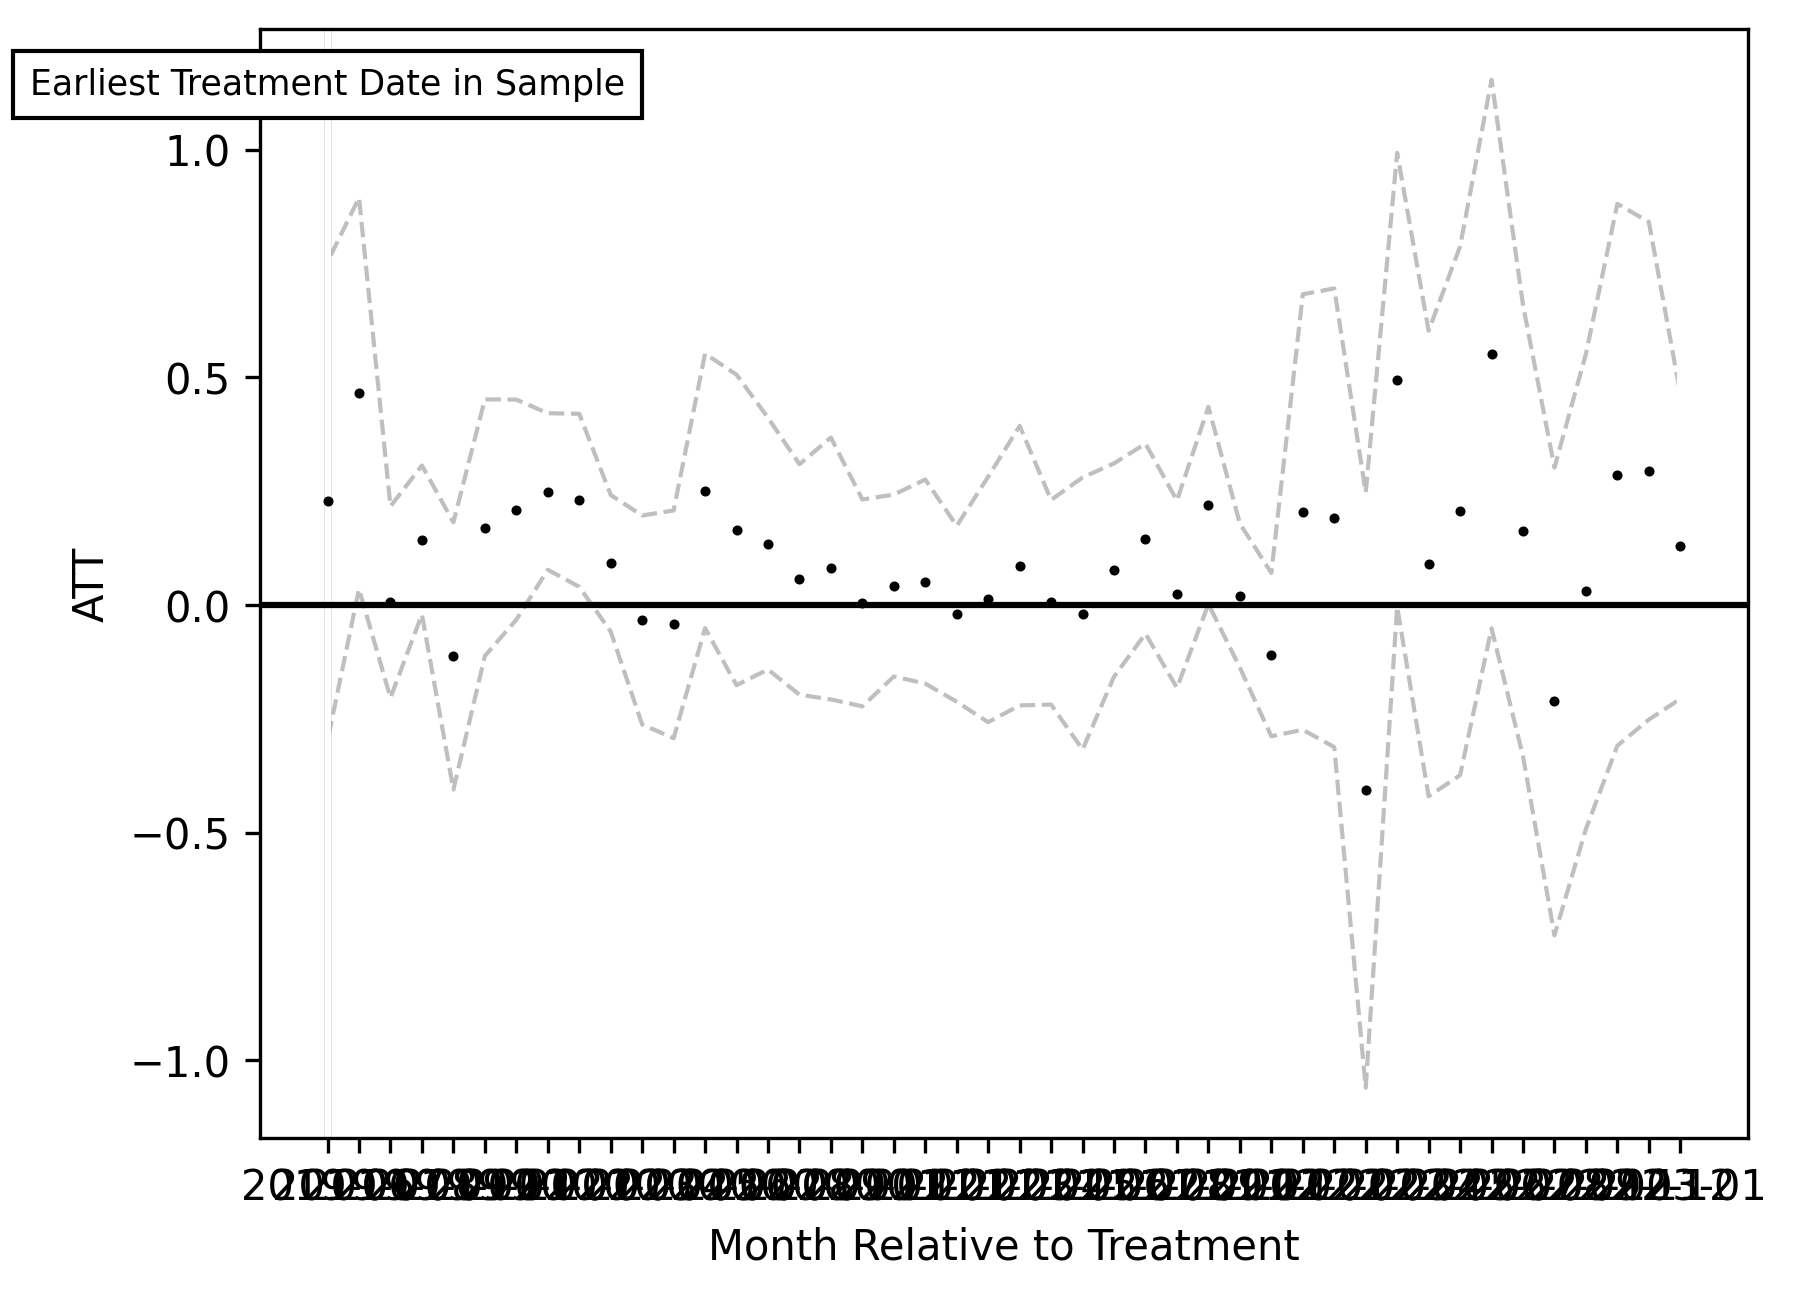

In [31]:
# Plot D.R. ATT(t)s.
aggregate_by_time_and_plot(att_gt, int_to_month_dictionary, OUTPUT_FIGURES, "att_gt_dr_time.png",
                           title="")